In [1]:
import numpy as np
import ctqmc
import importlib
import conf
import ctqmc
import mpl_interface
import collections
import line_profiler
from mpl_interface import plt, spinplot, bondplot, cutplot
importlib.reload(conf)
importlib.reload(ctqmc)
importlib.reload(mpl_interface)

<module 'mpl_interface' from '/root/study/ctqmc/mpl_interface.py'>

In [2]:
pr = line_profiler.LineProfiler()

In [3]:
p = {'beta': 100, 'J': 1.0, 'Hx': 1.0,'L': 20}
u = ctqmc.Updater(**p)
pr.add_function(u.update)

In [4]:
%time u.remove_cut()
%time u.add_cut()
%time u.update_bond()
%time u.update()

CPU times: user 40 µs, sys: 13 µs, total: 53 µs
Wall time: 53.4 µs
CPU times: user 1.05 ms, sys: 14 µs, total: 1.06 ms
Wall time: 1.06 ms
CPU times: user 858 µs, sys: 0 ns, total: 858 µs
Wall time: 859 µs
CPU times: user 2.7 ms, sys: 0 ns, total: 2.7 ms
Wall time: 2.64 ms


In [5]:
pr.run('u.update()')

In [6]:
pr.print_stats()

Timer unit: 1e-09 s

Total time: 0.0570059 s
File: /root/study/ctqmc/ctqmc.py
Function: update at line 82

Line #      Hits         Time  Per Hit   % Time  Line Contents
    82                                               def update(self):
    83         1   51324419.0    5e+07     90.0          self.cluster = self._gen_cluster(self.cuttaux)
    84         1    1139678.0    1e+06      2.0          flip = self._gen_flip(self.cuttaux)
    85         1    2059618.0    2e+06      3.6          self._connect_clusterbybond(self.cuttaux, self.bond)
    86         1    2482151.0    2e+06      4.4          self._cluster_flip(self.cluster, flip)



In [9]:
p = {'beta': 100, 'J': 1.0, 'Hx': 1.0,'L': 100}
szs = []
Hxs = np.linspace(0.1, 2, 10)
ntot = 100
nthermal=20
for Hx in Hxs:
    p['Hx'] = Hx
    sz = np.zeros(ntot - nthermal)
    for i in range(ntot):
        u = ctqmc.Updater(**p)
        u.remove_cut()
        u.add_cut()
        u.update_bond()
        u.update()
        if i > nthermal:
            sz[i - nthermal] = u.measure_sz()
    szs.append(np.mean(np.abs(sz)))

(0.0, 0.138917284504781)

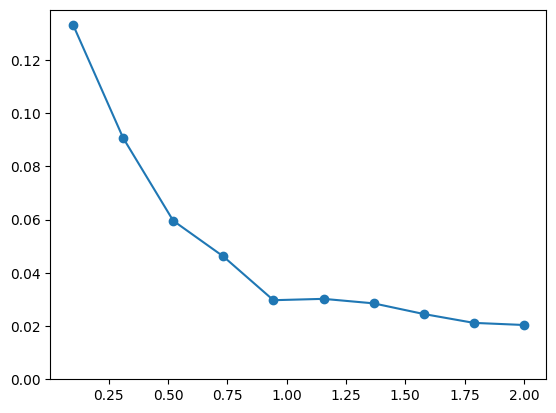

In [8]:
fig, ax = plt.subplots()
ax.plot(Hxs, szs, 'o-')
ax.set_ylim(bottom=0)

In [ ]:
p = {'beta': 100, 'J': 1.0, 'Hx': 1.0,'L': 100}
nHx = 10
nt = 10
Hxs = np.linspace(0.1, 2, nHx)
ts = np.linspace(0.1, 100, nt)
ntot = 100
nthermal=20
szs = np.zeros((nHx, nt))
for t in ts:
    beta = 1.0/t
    p['beta'] = beta
    for Hx in Hxs:
        p['Hx'] = Hx
        sz = np.zeros(ntot - nthermal)
        for i in range(ntot):
            u = ctqmc.Updater(**p)
            u.remove_cut()
            u.add_cut()
            u.update_bond()
            u.update()
            if i > nthermal:
                sz[i - nthermal] = u.measure_sz()
        szs.append(np.mean(np.abs(sz)))